# EDA

In [ ]:
import pandas as pd
import json
df = pd.read_json('/content/Data.json', lines=True)

In [ ]:
print(f"Num de lignes : {df.shape[0]}")
print(f"Num de colonnes : {df.shape[1]}")

Num de lignes : 10261
Num de colonnes : 9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [ ]:
print("Valeurs NaN :")
df.isna().sum()

Valeurs NaN :


,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0
avis,0


In [ ]:
df = df.dropna()
has_nan = df.isna().any().any()
print("NaN ?", has_nan)

NaN ? False


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,avis
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014",positif
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013",positif
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013",positif
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",positif
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014",positif


overall
5    6918
4    2080
3     771
2     249
1     216
Name: count, dtype: int64


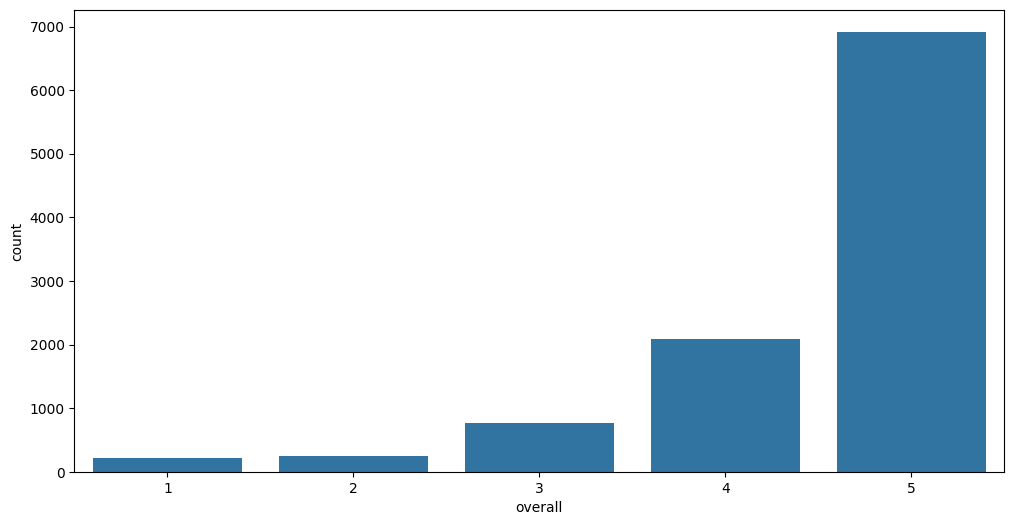

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x='overall',data=df)
print(df["overall"].value_counts())

avis
positif    8998
neutre      771
négatif     465
Name: count, dtype: int64


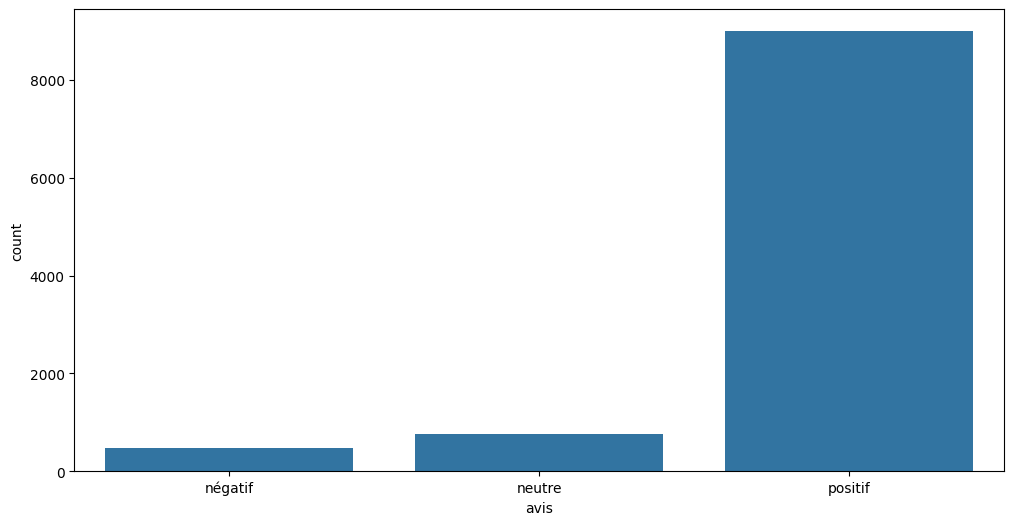

In [ ]:
df['avis'] = pd.cut(df['overall'],
                      bins=[-float('inf'), 2, 3, float('inf')],
                      labels=['négatif', 'neutre', 'positif'],
                      include_lowest=True)
plt.figure(figsize=(12,6))
sns.countplot(x='avis',data=df)
print(df["avis"].value_counts())

In [ ]:
import pandas as pd
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

stop_words = {'this', 'that', 'with', 'from', 'have', 'they', 'what', 'when', 'where',
              'which', 'who', 'whom', 'but', 'and', 'for', 'the', 'are', 'was',
              'were', 'you', 'your', 'there', 'their', 'then', 'than'}

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['cleaned_text'] = df['reviewText'].dropna().apply(clean_text)

def get_word_counts(df_subset):
    words = df_subset['cleaned_text'].dropna().apply(
        lambda x: [word for word in x.split() if len(word) > 3 and word not in stop_words]
    ).explode()
    word_counts = Counter(words)
    word_count_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    return word_count_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

df_positive = df[df['avis'] == 'positif']
df_negative = df[df['avis'] == 'négatif']
df_neutre = df[df['avis'] == 'neutre']

word_counts_in_positive = get_word_counts(df_positive)
word_counts_in_negative = get_word_counts(df_negative)
word_counts_in_neutre = get_word_counts(df_neutre)

In [ ]:
word_counts_in_positive = get_word_counts(df_positive)
print("Word Counts for positif:")
word_counts_in_positive.head(10)

Word Counts for positif:


,Word,Count
0,guitar,4739
1,these,3828
2,great,3708
3,very,3350
4,like,3327
5,good,3203
6,just,3094
7,sound,3042
8,strings,2951
9,well,2721


In [ ]:
word_counts_in_negative = get_word_counts(df_negative)
print("\nWord Counts for négatif:")
word_counts_in_negative.head(10)


Word Counts for négatif:


,Word,Count
0,guitar,244
1,just,214
2,like,198
3,these,189
4,would,173
5,sound,169
6,very,163
7,more,137
8,pedal,136
9,will,136


In [ ]:
word_counts_in_neutre = get_word_counts(df_neutre)
print("\nWord Counts for neutre:")
word_counts_in_neutre.head(10)


Word Counts for neutre:


,Word,Count
0,guitar,391
1,just,380
2,like,344
3,good,327
4,more,320
5,these,320
6,would,284
7,very,282
8,sound,266
9,strings,254


# Installing PySpark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lower, udf
from pyspark.sql.types import ArrayType, StringType
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Sentiment Analysis") \
       .getOrCreate()

spark

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
93 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
spark

# PySpark Mlib Model

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lower, split, regexp_replace, concat_ws, when, udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import Tokenizer, CountVectorizer, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline, Transformer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.param.shared import HasInputCol, HasOutputCol
from pyspark.ml.util import DefaultParamsWritable, DefaultParamsReadable, MLWritable, MLReadable
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# ====================== UDF Definitions ======================
stop_words = set(stopwords.words('english'))
stop_words.remove('not')  # Keep 'not' for sentiment analysis

def stopwords_remove(tokens):
    return [word for word in tokens if word not in stop_words]

stopwords_remove_udf = udf(stopwords_remove, ArrayType(StringType()))

lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

lemmatization_udf = udf(lemmatization, ArrayType(StringType()))

def remove_short_words(tokens):
    return [word for word in tokens if len(word) > 2]

remove_short_words_udf = udf(remove_short_words, ArrayType(StringType()))

# ====================== Custom ======================
class LowerTransformer(Transformer, HasInputCol, HasOutputCol, DefaultParamsWritable, DefaultParamsReadable):
    def __init__(self, inputCol=None, outputCol=None):
        super(LowerTransformer, self).__init__()
        self._set(inputCol=inputCol, outputCol=outputCol)

    def _transform(self, dataset):
        return dataset.withColumn(self.getOutputCol(), lower(col(self.getInputCol())))

class StopwordsRemover(Transformer, HasInputCol, HasOutputCol, DefaultParamsWritable, DefaultParamsReadable):
    def __init__(self, inputCol=None, outputCol=None):
        super(StopwordsRemover, self).__init__()
        self._set(inputCol=inputCol, outputCol=outputCol)

    def _transform(self, dataset):
        return dataset.withColumn(self.getOutputCol(), stopwords_remove_udf(col(self.getInputCol())))

class Lemmatizer(Transformer, HasInputCol, HasOutputCol, DefaultParamsWritable, DefaultParamsReadable):
    def __init__(self, inputCol=None, outputCol=None):
        super(Lemmatizer, self).__init__()
        self._set(inputCol=inputCol, outputCol=outputCol)

    def _transform(self, dataset):
        return dataset.withColumn(self.getOutputCol(), lemmatization_udf(col(self.getInputCol())))

class ShortWordRemover(Transformer, HasInputCol, HasOutputCol, DefaultParamsWritable, DefaultParamsReadable):
    def __init__(self, inputCol=None, outputCol=None):
        super(ShortWordRemover, self).__init__()
        self._set(inputCol=inputCol, outputCol=outputCol)

    def _transform(self, dataset):
        return dataset.withColumn(self.getOutputCol(), remove_short_words_udf(col(self.getInputCol())))

# ====================== Data Loading & Preprocessing ======================
# Load data (replace with your path)
data = spark.read.json("/content/Data.json")

# Drop unnecessary columns
cols_to_drop = ['asin', 'helpful', 'unixReviewTime', 'reviewTime', 'reviewerName', 'summary', 'reviewerID']
data = data.drop(*cols_to_drop).na.drop()

# Convert ratings to sentiment labels
data = data.withColumn("avis",
    when(col("overall") < 3, "négatif")
    .when(col("overall") == 3, "neutre")
    .otherwise("positif"))

# ====================== Create Label Column ======================
label_indexer = StringIndexer(inputCol="avis", outputCol="label")
indexer_model = label_indexer.fit(data)
data = indexer_model.transform(data)

# ====================== Train-Test Split & Balancing ======================
train, test = data.randomSplit([0.8, 0.2], seed=42)

# Class balancing (undersampling)
label_counts = train.groupBy("label").count().collect()
min_count = min(row['count'] for row in label_counts)
balanced_train = None

for row in label_counts:
    fraction = min_count / row['count']
    sampled = train.filter(col("label") == row['label']).sample(False, fraction, seed=42)
    balanced_train = sampled if balanced_train is None else balanced_train.union(sampled)

# ====================== Pipeline Definition ======================
lower_case = LowerTransformer(inputCol="reviewText", outputCol="reviewText_lower")
tokenize = Tokenizer(inputCol="reviewText_lower", outputCol="tokens")
remove_stopwords = StopwordsRemover(inputCol="tokens", outputCol="filtered_tokens")
lemmatize = Lemmatizer(inputCol="filtered_tokens", outputCol="lemmatized_tokens")
remove_short = ShortWordRemover(inputCol="lemmatized_tokens", outputCol="final_tokens")
vectorizer = CountVectorizer(inputCol="final_tokens", outputCol="features", minDF=0.01, maxDF=0.9, vocabSize=500)
classifier = LogisticRegression(maxIter=20, regParam=0.1)

pipeline = Pipeline(stages=[
    lower_case,
    tokenize,
    remove_stopwords,
    lemmatize,
    remove_short,
    vectorizer,
    classifier
])

# ====================== Train & Evaluate ======================
model = pipeline.fit(balanced_train)
predictions = model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
print("Accuracy:", evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"}))
print("F1 Score:", evaluator.evaluate(predictions, {evaluator.metricName: "f1"}))
print("Precision:", evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"}))
print("Recall:", evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"}))

# ====================== Save the Model ======================
model.save("/content/model_text_classification")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.5951539626451288
F1 Score: 0.6843560435145609
Precision: 0.858405329711658
Recall: 0.5951539626451288


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from pyspark.ml import PipelineModel

# Initialize Spark (if not already initialized)
# spark = SparkSession.builder.appName("TextClassificationInference").getOrCreate()

# Load the trained model
model = PipelineModel.load("/content/model_text_classification")

# Define the label mapping
label_map = {0.0: "positif", 1.0: "négatif", 2.0: "neutre"}

def predict_sentiment(review):
    input_data = spark.createDataFrame([(review,)], ["reviewText"])
    prediction = model.transform(input_data)
    predicted_label = prediction.select("prediction").collect()[0]["prediction"]
    sentiment = label_map.get(predicted_label, "unknown")
    english_map = {"positif": "positive", "négatif": "negative", "neutre": "neutral"}
    return english_map.get(sentiment, "unknown")

# Test the new reviews
new_reviews = [
    "I absolutely love this item, it exceeded my expectations!",
    "Really disappointed, the quality is poor and it stopped working.",
    "The product is decent, but the instructions were unclear.",
    "Fantastic purchase, highly recommend it to everyone!",
    "Not worth the money, it feels cheap and flimsy.",
    "It’s fine, works as expected but nothing remarkable.",
    "This is hands-down the best purchase I’ve made this year!",
    "The item is alright, but the delivery took forever.",
    "Super impressed with the quality, will buy again!",
]

for review in new_reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")

Review: I absolutely love this item, it exceeded my expectations!
Predicted Sentiment: positive

Review: Really disappointed, the quality is poor and it stopped working.
Predicted Sentiment: neutral

Review: The product is decent, but the instructions were unclear.
Predicted Sentiment: positive

Review: Fantastic purchase, highly recommend it to everyone!
Predicted Sentiment: positive

Review: Not worth the money, it feels cheap and flimsy.
Predicted Sentiment: negative

Review: It’s fine, works as expected but nothing remarkable.
Predicted Sentiment: negative

Review: This is hands-down the best purchase I’ve made this year!
Predicted Sentiment: positive

Review: The item is alright, but the delivery took forever.
Predicted Sentiment: negative

Review: Super impressed with the quality, will buy again!
Predicted Sentiment: positive



In [ ]:
import zipfile
import os
from google.colab import files

# Define the model directory and output ZIP file path
model_dir = "/content/model_text_classification"
zip_path = "/content/model_text_classification.zip"

# Create a ZIP file
def zip_model_directory(directory, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files_list in os.walk(directory):
            for file in files_list:
                file_path = os.path.join(root, file)
                # Store the file in the ZIP with a relative path
                zipf.write(file_path, os.path.relpath(file_path, os.path.dirname(directory)))

# Zip the model directory
zip_model_directory(model_dir, zip_path)

# Download the ZIP file
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>